<a href="https://colab.research.google.com/github/sush0677/pytorch_coding/blob/main/pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#pytorch workflow
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np
torch.__version__

'2.3.1+cu121'

In [2]:
w = 0.7
b = 0.3
start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = w * X + b
X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [3]:
len(X), len(y)

(50, 50)

In [4]:
#splitting data into training and test sets
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [5]:
#visulization of the data
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
    """
    Plots training data, test data and compares predictions.
    """
    plt.figure(figsize=(10, 7))
    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b",s=4, label="Training data")
    # Plot testing data in green
    plt.scatter(test_data, test_labels, c="g",s=4, label="Testing data")
    if predictions is not None:
        # Plot the predictions in red (predictions were made on the test data)
        plt.scatter(test_data, predictions, c="r",s=4, label="Predictions")
    # Show the legend
    plt.legend(prop={"size": 14})

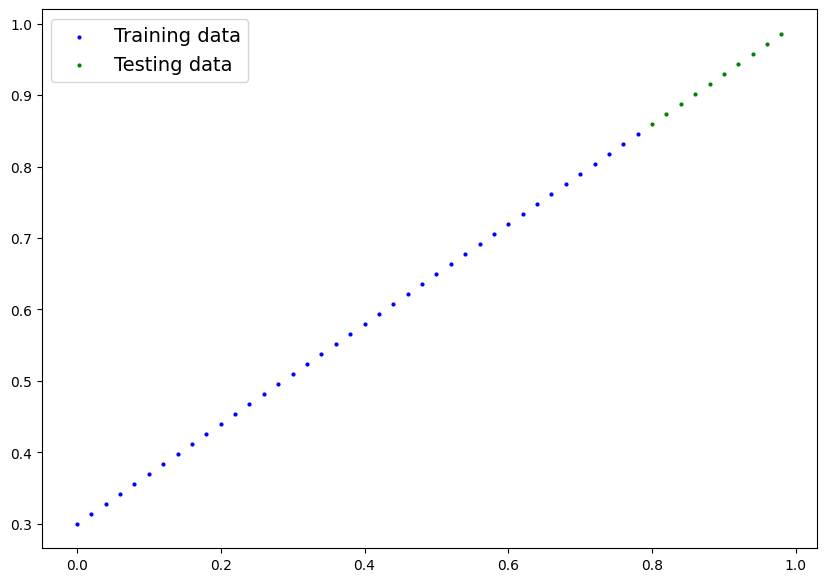

In [6]:
plot_predictions()


In [7]:
#building model
#linear reg model
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        # self.weights = nn.Parameter(torch.randn(1,
        #                                         requires_grad=True,
        #                                         dtype=torch.float))
        # self.bias = nn.Parameter(torch.randn(1,
        #                                      requires_grad=True,
        #                                      dtype=torch.float))
        self.linear_layer = nn.Linear(in_features=1,
                                      out_features=1)
    def forward(self,x:torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

    # def forward(self,x:torch.Tensor) -> torch.Tensor:
    #     return self.weights * x + self.bias


In [8]:
#checking contents in pytorch model
torch.manual_seed(42)
model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([[0.7645]], requires_grad=True),
 Parameter containing:
 tensor([0.8300], requires_grad=True)]

In [9]:
#list of named parameters
list(model_0.state_dict().items())

[('linear_layer.weight', tensor([[0.7645]])),
 ('linear_layer.bias', tensor([0.8300]))]

In [10]:
#making prediction with model
with torch.inference_mode():
    y_preds = model_0(X_test)
y_preds

tensor([[1.4416],
        [1.4569],
        [1.4722],
        [1.4875],
        [1.5028],
        [1.5181],
        [1.5334],
        [1.5487],
        [1.5640],
        [1.5793]])

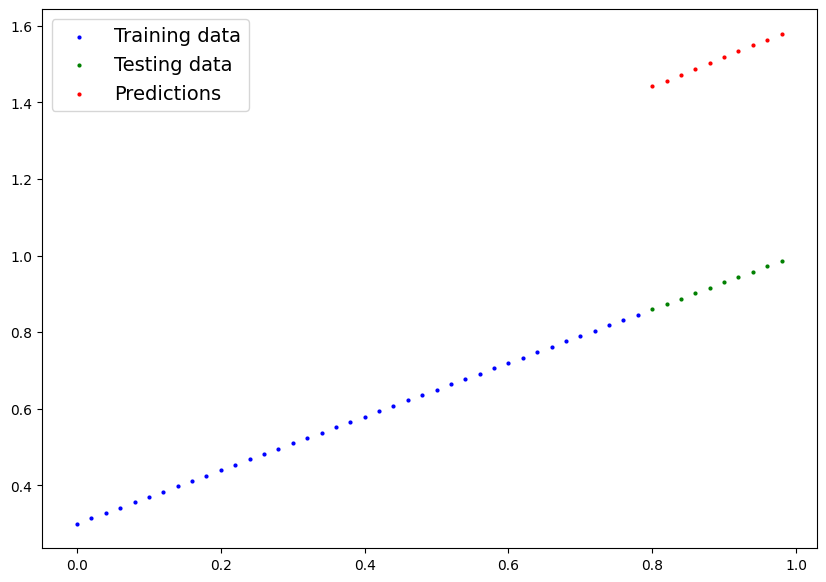

In [11]:
plot_predictions(predictions=y_preds)

In [12]:
#training --> Using a loss function
loss_fn = nn.L1Loss()

#optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01) #hyperparameter

In [13]:
#traing loop
epochs = 200 #hyperparameter
epoch_count = []
loss_values = []
test_loss_values = []

for epoch in range(epochs):
    model_0.train()
    y_pred = model_0(X_train) #forward pass
    loss = loss_fn(y_pred,y_train) #calculating the loss funtion
    # print(f"Loss: {loss}")
    optimizer.zero_grad() #setting gradients to zero
    loss.backward() #performing the backward propogation
    optimizer.step() #optimizing by performing gradient descent
    #testing of the model
    model_0.eval()
    with torch.inference_mode():
        test_pred = model_0(X_test)
        test_loss = loss_fn(test_pred,y_test)
        if epoch % 10 == 0:
            epoch_count.append(epoch)
            loss_values.append(loss)
            test_loss_values.append(test_loss)
            print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")
print(model_0.state_dict())

Epoch: 0 | Loss: 0.5551779866218567 | Test loss: 0.5739762187004089
Epoch: 10 | Loss: 0.4399680495262146 | Test loss: 0.4392663538455963
Epoch: 20 | Loss: 0.3247582018375397 | Test loss: 0.30455657839775085
Epoch: 30 | Loss: 0.20954827964305878 | Test loss: 0.16984674334526062
Epoch: 40 | Loss: 0.09433844685554504 | Test loss: 0.03513689711689949
Epoch: 50 | Loss: 0.023886386305093765 | Test loss: 0.04784906655550003
Epoch: 60 | Loss: 0.0199567973613739 | Test loss: 0.04580312222242355
Epoch: 70 | Loss: 0.016517987474799156 | Test loss: 0.0375305712223053
Epoch: 80 | Loss: 0.013089170679450035 | Test loss: 0.029944902285933495
Epoch: 90 | Loss: 0.009653178043663502 | Test loss: 0.02167237363755703
Epoch: 100 | Loss: 0.006215679459273815 | Test loss: 0.014086711220443249
Epoch: 110 | Loss: 0.002787243574857712 | Test loss: 0.005814164876937866
Epoch: 120 | Loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 130 | Loss: 0.0012645035749301314 | Test loss: 0.01380180753767

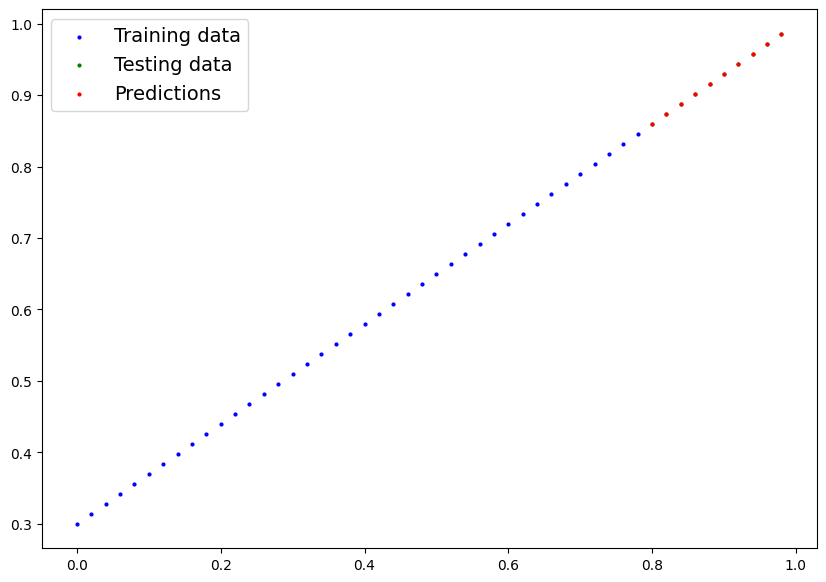

In [14]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)
  plot_predictions(predictions=y_preds_new)

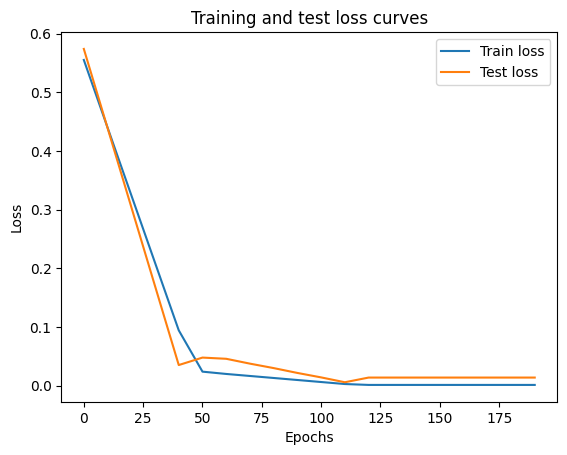

In [15]:
plt.plot(epoch_count,np.array(torch.tensor(loss_values).numpy()),label="Train loss")
plt.plot(epoch_count,test_loss_values,label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

In [16]:
## Saving the model and reuse the model
from pathlib import Path
# Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# Save model state_dict()
MODEL_NAME = "01_pytorch_workflow_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

#save the model
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)


In [17]:
#loading the model state_dict
#creating an instance of the class
loaded_model_0 = LinearRegressionModel()
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>